In [1]:
#Import Dataset and read
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
d1 = pd.read_csv(r"/home/akhopkar/Downloads/data_1.csv"#Enter the file path of the dataset1)
d2 = pd.read_csv(r"/home/akhopkar/Downloads/data_2.csv"#Enter the file path of the dataset2)

In [2]:
data1 = d1.values.tolist()
data2 = d2.values.tolist()

In [3]:
#Split Data
xdata1 =[]
ydata1 =[]
xdata2 =[]
ydata2 =[]
for i in range(len(data1)):
    xdata1.append(data1[i][0])
    ydata1.append(data1[i][1])
for i in range(len(data2)):
    xdata2.append(data2[i][0])
    ydata2.append(data2[i][1])

In [4]:
#Constuct Model: Least Square Error
def powList(x,n):
    xpow = []
    for i in range(len(x)):
        xpow.append(pow(x[i],n))    
    return xpow

In [5]:
# #Model Function
def buildModel(x,y):
    X = []
    for i in range(len(x)):
        X.append([1,x[i],pow(x[i],2)])
    Xdata = np.array(X)
    Y = np.array(y)
    #A = ((XTX)^-1)XTB
    #Model is build by following least square error
    A = np.dot(np.linalg.inv(np.dot(np.transpose(Xdata),Xdata)),np.dot(np.transpose(Xdata),Y))
    return A

In [109]:
#Predict values and plot
def outputPoint(x,y,A1):
    ypred = np.array([A1[2]])*powList(x,2)+np.array([A1[1]])*x+np.array([A1[0]])
    return ypred
#Perform Least square method
def leastsqrmethod(xdata,ydata):
    plt.plot(xdata,ydata,'o')
    plt.plot(xdata,outputPoint(xdata,ydata,buildModel(xdata,ydata)), color='red')
    plt.show()

In [175]:
#Perform RANSAC
def ransac(xdata,ydata):
    bestfit= 0
    #Defining Hyper parameters
    n=1000
    t=45
    ransac_ratio = 0.9
    ratio =0
    #Iterate the process for n number of times
    for i in range(n):
        #Selecting minimum number of sample points
        ix = random.sample(range(len(xdata)), 3)
        #Set/Reset values of the data structures to be used
        n_inlier =0
        n_outlier =0
        alsoinlier_x=[]
        alsoinlier_y=[]
        outlier_x = []
        outlier_y =[]
        maybeinlier_x=[]
        maybeinlier_y=[]
        #Update points wrt the sample points take, maybe inliers
        for i in ix:
            maybeinlier_x.append(xdata[i])
            maybeinlier_y.append(ydata[i])
        
        maybeModel = buildModel(maybeinlier_x,maybeinlier_y)
        ypred = outputPoint(xdata,ydata,maybeModel)
        
        for i in range(len(xdata)):
           #If error function (vertical error) of the model is less than threshold,
           #the chosen random points are a part of the consensus set - alsoinliers
            if abs(ydata[i]-ypred[i]) < t:
                alsoinlier_x.append(xdata[i])
                alsoinlier_y.append(ydata[i])
                n_inlier+=1
            else: #Reject Outliers
                n_outlier+=1
                outlier_x.append(xdata[i])
                outlier_y.append(ydata[i])
                
                #Build model using the new inliers
        bettermodel = buildModel(alsoinlier_x,alsoinlier_y) 
        # If the ratio/probability of inliers is greater than the desired probability
        if n_inlier/len(xdata) > ratio:
            
            #Cache model output points
            
            bestfit = bettermodel
            ratio = n_inlier/len(xdata)
            finaloutlier_x=list(outlier_x)
            finaloutlier_y=list(outlier_y)
                #If error generated wrt the model is less than the highest error
                #Update the model parameters
                #Update highest error error
                
            if ratio >= ransac_ratio:
                print("Better model found")
                print(n_inlier)
                break
        #Best fit of the model found, update the outlier list
    plt.figure(1)               
    plt.plot(xdata,outputPoint(xdata,ydata,bestfit),'', color='red')
    plt.plot(xdata,ydata,'o')
    plt.figure(2)
    plt.plot(xdata,outputPoint(xdata,ydata,bestfit),'', color='red')
    plt.plot(xdata,ydata,'o')
    plt.plot(finaloutlier_x,finaloutlier_y,'o',color='orange')
    plt.legend(['RANSAC curve fit','Inlier data set','Outliers'])
    plt.show()
          


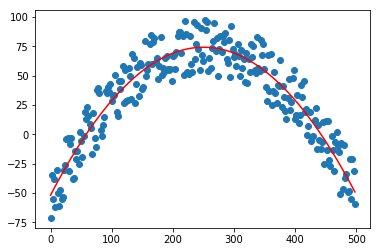

Better model found
250


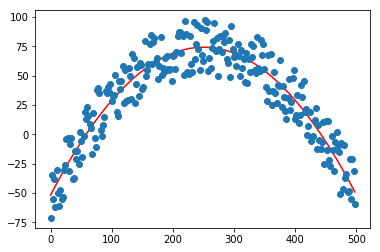

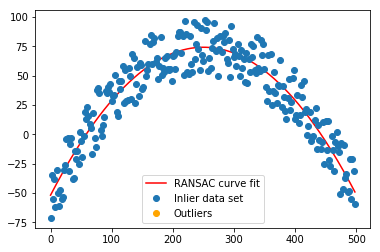

In [180]:
#Observe Plots for Dataset1
leastsqrmethod(xdata1,ydata1)
ransac(xdata1,ydata1)
plt.close()

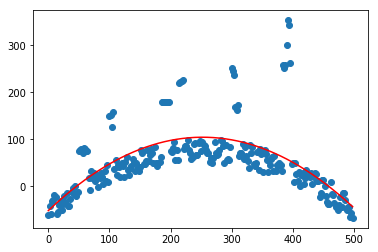

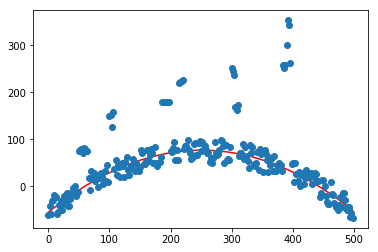

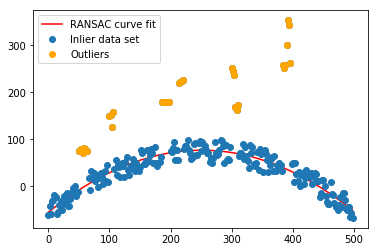

In [181]:
#Observe Plots for Dataset2
leastsqrmethod(xdata2,ydata2)
ransac(xdata2,ydata2)
plt.close()

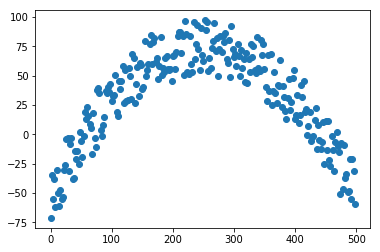

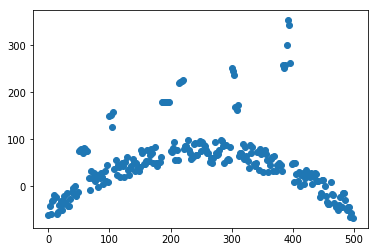

In [179]:
plt.figure(1)
plt.plot(xdata1,ydata1,'o')
plt.figure(2)
plt.plot(xdata2,ydata2,'o')
plt.show()

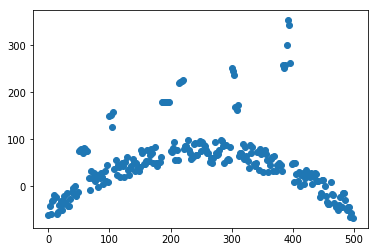